# Lab 1.4: Introduction to Linear Regression

Linear regression is an approach to modeling the relationship between a continuous dependent variable (**y**) and 
one or more independent variables (**x**). Here you will be introduced to fitting the model and interpreting the results before we dive more into the details of linear regression later in the course.

1. We will be using the `prestige` data in `statsmodels`. `statsmodels` is the de facto library for performing regression
   tasks in Python. Load the data with the follow code. **Remember to add a column of `1` to the x matrix for the 
   model to fit an intercept**.

   ```python 
   import statsmodels.api as sm
   prestige = sm.datasets.get_rdataset("Duncan", "car", cache=True).data
   y = prestige['prestige']
   X = prestige[['income', 'education']].astype(float)
   ```

2. Explore the data by making a [scatter_matrix](http://pandas.pydata.org/pandas-docs/version/0.15.0/visualization.html#visualization-scatter-matrix)
   and a [boxplot](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.boxplot.html)
   to show the range of each of your variables.
   
3. The beta coefficients of a linear regression model can be calculated by solving the normal equation.
   Using numpy, write a function that solves the **normal equation** (below).
   As input your function should take a matrix of features (**x**) and
   a vector of target (**y**). You should return a vector of beta coefficients 
   that represent the line of best fit which minimizes the residual. 
   
    $$ \hat{\beta} = (X^TX)^{-1}X^Ty$$

4. Verify your results using statsmodels. Use the code below as a reference.
   ```python
   import statsmodels.api as sm
   model = sms.OLS(y, X).fit()
   summary = model.summary()
   ```

5. Interpret your result summary, focusing on the beta coefficents and the $R^2$. 


In [1]:
!conda install statsmodels

Fetching package metadata .......
Solving package specifications: ..........

# All requested packages already installed.
# packages in environment at /Users/jonathanhilgart/anaconda:
#
statsmodels               0.6.1               np111py35_1  


In [2]:
import statsmodels as sm

# Question Two

In [13]:
import statsmodels.api as sm
prestige = sm.datasets.get_rdataset("Duncan", "car", cache=True).data
print(prestige)
y = prestige['prestige']
x = prestige[['income', 'education']].astype(float)
x = sm.add_constant(x)

                    type  income  education  prestige
accountant          prof      62         86        82
pilot               prof      72         76        83
architect           prof      75         92        90
author              prof      55         90        76
chemist             prof      64         86        90
minister            prof      21         84        87
professor           prof      64         93        93
dentist             prof      80        100        90
reporter              wc      67         87        52
engineer            prof      72         86        88
undertaker          prof      42         74        57
lawyer              prof      76         98        89
physician           prof      76         97        97
welfare.worker      prof      41         84        59
teacher             prof      48         91        73
conductor             wc      76         34        38
contractor          prof      53         45        76
factory.owner       prof    

In [14]:
print(x.head())

            const  income  education
accountant      1    62.0       86.0
pilot           1    72.0       76.0
architect       1    75.0       92.0
author          1    55.0       90.0
chemist         1    64.0       86.0


Explore the data by making a scatter_matrix and a boxplot to show the range of each of your variables.

Populating the interactive namespace from numpy and matplotlib


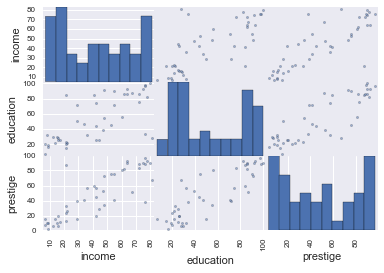

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.tools.plotting import scatter_matrix
%pylab inline
scatter_matrix(prestige);


/Users/jonathanhilgart/anaconda/lib/python3.5/site-packages/seaborn/categorical.py:2171: UserWarning: The boxplot API has been changed. Attempting to adjust your arguments for the new API (which might not work). Please update your code. See the version 0.6 release notes for more info.
  warnings.warn(msg, UserWarning)


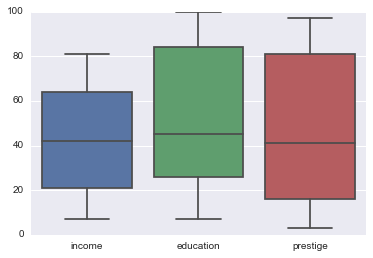

In [36]:
sns.boxplot(prestige);

# Question three 
3. The beta coefficients of a linear regression model can be calculated by solving the normal equation.
   Using numpy, write a function that solves the **normal equation** (below).
   As input your function should take a matrix of features (**x**) and
   a vector of target (**y**). You should return a vector of beta coefficients 
   that represent the line of best fit which minimizes the residual. 
   
    $$ \hat{\beta} = (X^TX)^{-1}X^Ty$$

In [61]:
import numpy as np
from numpy.linalg import det,inv

In [56]:

def beta_coefficients(features_matrix,target_y):
    features_matrix =np.asarray(features_matrix)
    target_y = np.asarray(target_y)
    print(( np.linalg.inv(features_matrix.T.dot(features_matrix)).dot(features_matrix.T)).dot(target_y))


In [57]:
beta_coefficients(x,y)

[-6.06466292  0.59873282  0.54583391]


# Question Four
Verify your results using statsmodels. Use the code below as a reference.
import statsmodels.api as sm
model = sms.OLS(y, X).fit()
summary = model.summary()

In [64]:
import statsmodels.api as sms
model = sms.OLS(y, x).fit()
summary = model.summary()


In [65]:
print(summary)

                            OLS Regression Results                            
Dep. Variable:               prestige   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     101.2
Date:                Fri, 02 Sep 2016   Prob (F-statistic):           8.65e-17
Time:                        15:20:23   Log-Likelihood:                -178.98
No. Observations:                  45   AIC:                             364.0
Df Residuals:                      42   BIC:                             369.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         -6.0647      4.272     -1.420      0.1

In [ ]:
# The coeficients from stats models matching what my function returned

# Question five
Interpret your result summary, focusing on the beta coefficents and the  R^2 .


The R^2 shows that 83% of the model is explained by the variables (income, education), and both features are statistically significant (0 is not contained the the 95% confidence interval). This suggests that both income and education can explain 83% of a person's prestige. This is a very good model.

In addition, you can see from the model that the intercept is NOT statistically significant (0 falls within the confidence interval, P value is .16). 